### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

### Import Datasets

In [2]:
df1 = pd.read_csv("Data_2016.csv")
df2 = pd.read_csv("Data_2017.csv")
df3 = pd.read_csv("Data_2018.csv")
df4 = pd.read_csv("Data_2019.csv")
df5 = pd.read_csv("Data_2020.csv")

**Concatenate Datasets**

In [3]:
df = pd.concat([df1, df2, df3, df4, df5])

**Reset Index**

In [4]:
df = df.reset_index()
del df["index"]
df

,Year,Month,Day,Hour,Clearsky DHI,Clearsky DNI,Clearsky GHI,Temperature,DHI,DNI,GHI
0,2016,1,1,0,0,0,0,24.4,0,0,0
1,2016,1,1,1,0,0,0,24.1,0,0,0
2,2016,1,1,2,0,0,0,23.9,0,0,0
3,2016,1,1,3,0,0,0,23.9,0,0,0
4,2016,1,1,4,0,0,0,24.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43795,2020,12,31,19,0,0,0,25.0,0,0,0
43796,2020,12,31,20,0,0,0,24.9,0,0,0
43797,2020,12,31,21,0,0,0,24.8,0,0,0
43798,2020,12,31,22,0,0,0,24.6,0,0,0


**Prepare Date**

In [5]:
df['Date'] = df[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

df['Date'].head()

0    2016-1-1
1    2016-1-1
2    2016-1-1
3    2016-1-1
4    2016-1-1
Name: Date, dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

df['Date'].head()

0   2016-01-01
1   2016-01-01
2   2016-01-01
3   2016-01-01
4   2016-01-01
Name: Date, dtype: datetime64[ns]

In [7]:
df['Date'] +=  pd.to_timedelta(df.Hour, unit='h')

**Delete Extra Columns and Set Date as Index**

In [8]:
df = df.drop(columns = ["Year", "Month", "Day", "Hour"])
df = df.set_index("Date")
df.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Temperature,DHI,DNI,GHI
Date,,,,,,,
2016-01-01 00:00:00,0,0,0,24.4,0,0,0
2016-01-01 01:00:00,0,0,0,24.1,0,0,0
2016-01-01 02:00:00,0,0,0,23.9,0,0,0
2016-01-01 03:00:00,0,0,0,23.9,0,0,0
2016-01-01 04:00:00,0,0,0,24.0,0,0,0


### Data Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2016-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Clearsky DHI  43800 non-null  int64  
 1   Clearsky DNI  43800 non-null  int64  
 2   Clearsky GHI  43800 non-null  int64  
 3   Temperature   43800 non-null  float64
 4   DHI           43800 non-null  int64  
 5   DNI           43800 non-null  int64  
 6   GHI           43800 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.7 MB


In [10]:
df.describe()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Temperature,DHI,DNI,GHI
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,76.538562,280.540731,274.470662,28.423071,102.271233,183.296758,230.855776
std,92.661913,326.973798,349.435240,2.305980,137.848166,262.423821,312.822232
min,0.000000,0.000000,0.000000,22.300000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,26.900000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,28.300000,0.000000,0.000000,0.000000
75%,151.000000,626.000000,590.000000,29.900000,186.000000,367.000000,479.000000
max,492.000000,955.000000,1042.000000,36.500000,514.000000,954.000000,1042.000000


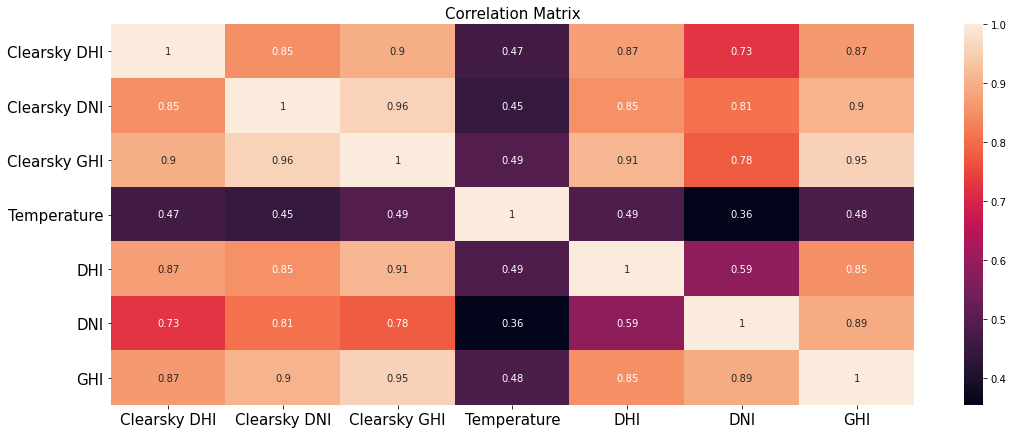

In [11]:
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix", size = 15)
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

In [12]:
df.sample()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Temperature,DHI,DNI,GHI
Date,,,,,,,
2017-05-08 03:00:00,0,0,0,29.1,0,0,0


### Data Visualizations

**Distribution of Clearsky DHI**

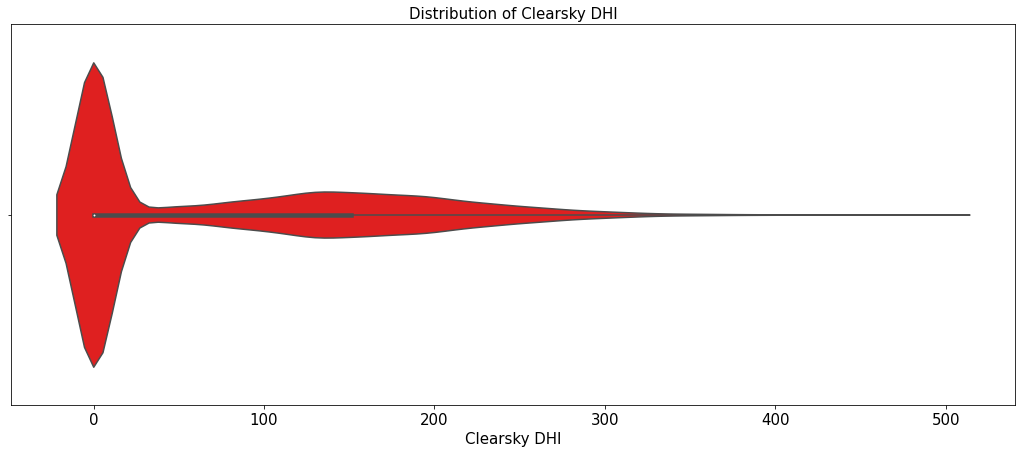

In [13]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Clearsky DHI", data = df, color = "red")
plt.title("Distribution of Clearsky DHI", size = 15)
plt.xlabel("Clearsky DHI", size = 15)
plt.xticks(size = 15)
plt.savefig("Clearsky DHI.png")
plt.show()

**Distribution of Clearsky DNI**

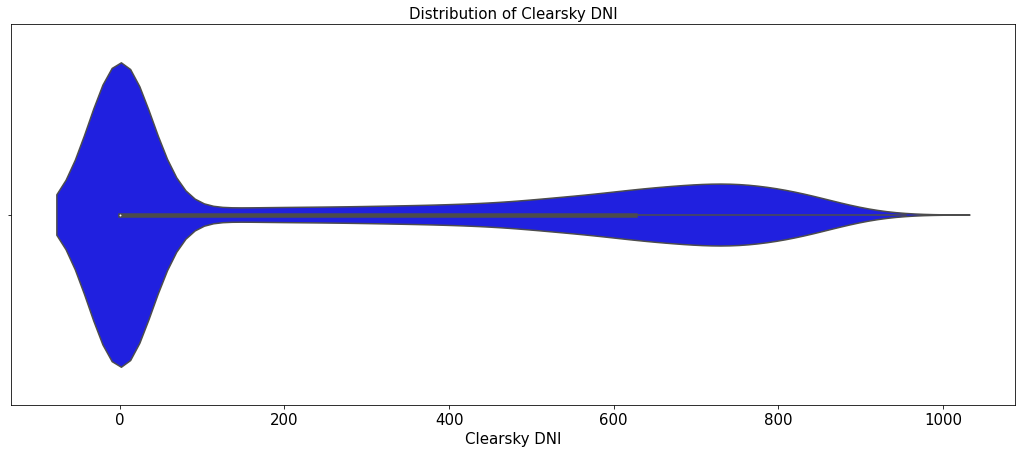

In [14]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Clearsky DNI", data = df, color = "blue")
plt.title("Distribution of Clearsky DNI", size = 15)
plt.xlabel("Clearsky DNI", size = 15)
plt.xticks(size = 15)
plt.savefig("Clearsky DNI.png")
plt.show()

**Distribution of Clearsky GHI**

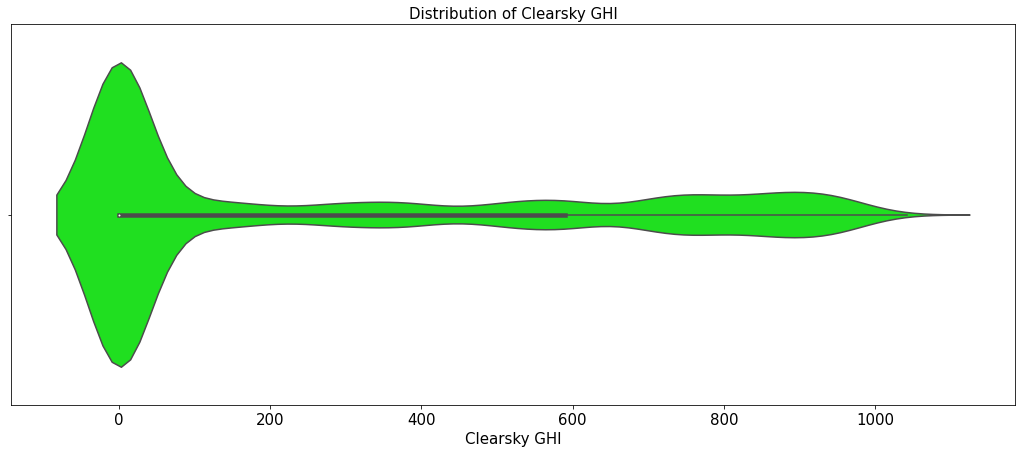

In [15]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Clearsky GHI", data = df, color = "lime")
plt.title("Distribution of Clearsky GHI", size = 15)
plt.xlabel("Clearsky GHI", size = 15)
plt.xticks(size = 15)
plt.savefig("Clearsky GHI.png")
plt.show()

**Distribution of Temperature**

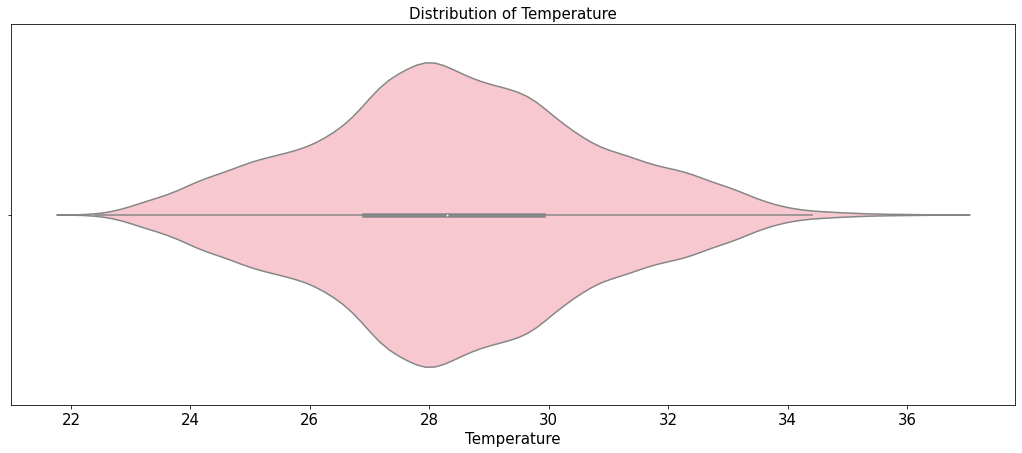

In [16]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "Temperature", data = df, color = "pink")
plt.title("Distribution of Temperature", size = 15)
plt.xlabel("Temperature", size = 15)
plt.xticks(size = 15)
plt.savefig("Temperature.png")
plt.show()

**Distribution of DHI**

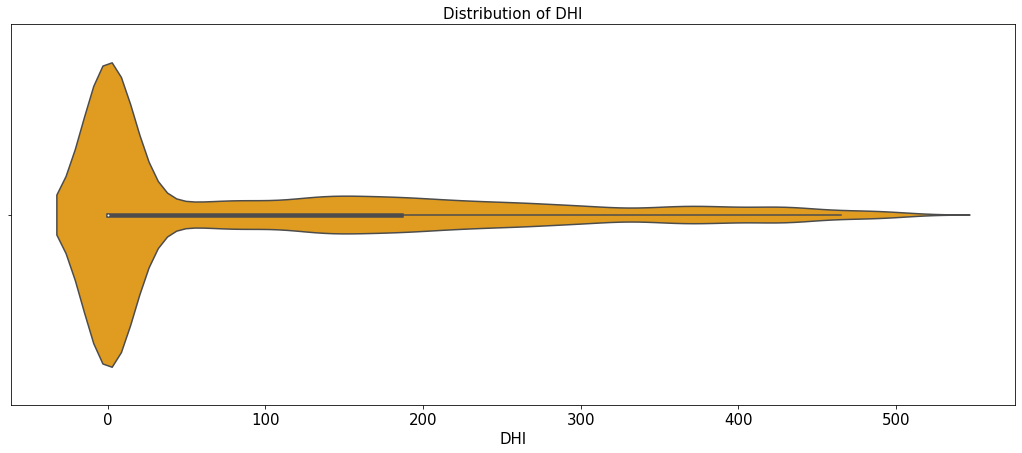

In [17]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "DHI", data = df, color = "orange")
plt.title("Distribution of DHI", size = 15)
plt.xlabel("DHI", size = 15)
plt.xticks(size = 15)
plt.savefig("DHI.png")
plt.show()

**Distribution of DNI**

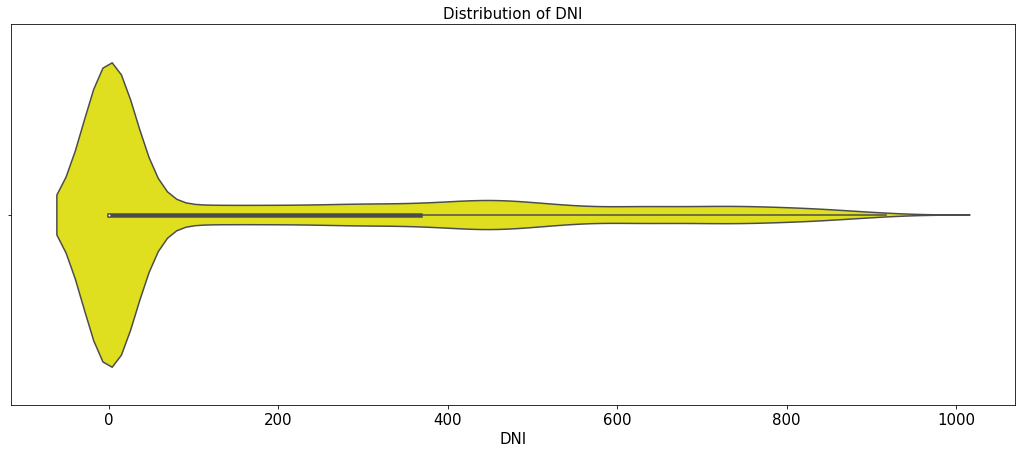

In [18]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "DNI", data = df, color = "yellow")
plt.title("Distribution of DNI", size = 15)
plt.xlabel("DNI", size = 15)
plt.xticks(size = 15)
plt.savefig("DNI.png")
plt.show()

**Distribution of GHI**

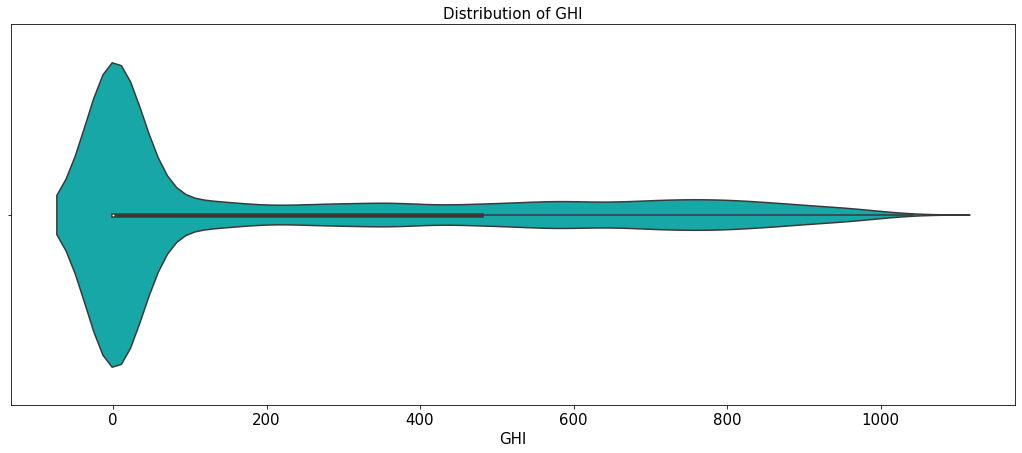

In [19]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "GHI", data = df, color = "c")
plt.title("Distribution of GHI", size = 15)
plt.xlabel("GHI", size = 15)
plt.xticks(size = 15)
plt.savefig("GHI.png")
plt.show()

### Models

In [20]:
# Features
X = df[df.columns.drop(["Clearsky GHI", "Temperature", "DNI"])]

# Target
y = df["Clearsky GHI"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = False)

### Random Forest Regressor

In [23]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
forecast = pd.DataFrame({"Actual": y_test,
                         "Predicted": pred_rf})
forecast.to_csv("forecast.csv")
forecast

,Actual,Predicted
Date,,
2020-01-01 00:00:00,0,0.0
2020-01-01 01:00:00,0,0.0
2020-01-01 02:00:00,0,0.0
2020-01-01 03:00:00,0,0.0
2020-01-01 04:00:00,0,0.0
...,...,...
2020-12-31 19:00:00,0,0.0
2020-12-31 20:00:00,0,0.0
2020-12-31 21:00:00,0,0.0


In [24]:
rf_mse = mean_squared_error(y_test, pred_rf, squared = False)
print("Root Mean Squared Error by Random Forest Default Parameters =", rf_mse)

Root Mean Squared Error by Random Forest Default Parameters = 9.385781398125355


### XGBoost

In [25]:
xg = XGBRegressor()

xg.fit(X_train, y_train)

pred_xg = xg.predict(X_test)
forecast_xg = pd.DataFrame({"Actual": y_test,
                         "Predicted": pred_xg})
forecast_xg.to_csv("forecast_xg.csv")
forecast_xg

,Actual,Predicted
Date,,
2020-01-01 00:00:00,0,0.018666
2020-01-01 01:00:00,0,0.018666
2020-01-01 02:00:00,0,0.018666
2020-01-01 03:00:00,0,0.018666
2020-01-01 04:00:00,0,0.018666
...,...,...
2020-12-31 19:00:00,0,0.018666
2020-12-31 20:00:00,0,0.018666
2020-12-31 21:00:00,0,0.018666


In [26]:
xg_rmse = mean_squared_error(y_test, pred_xg, squared = False)
print("Root Mean Squared Error by XGBoost =", xg_rmse)

Root Mean Squared Error by XGBoost = 10.764320651454483


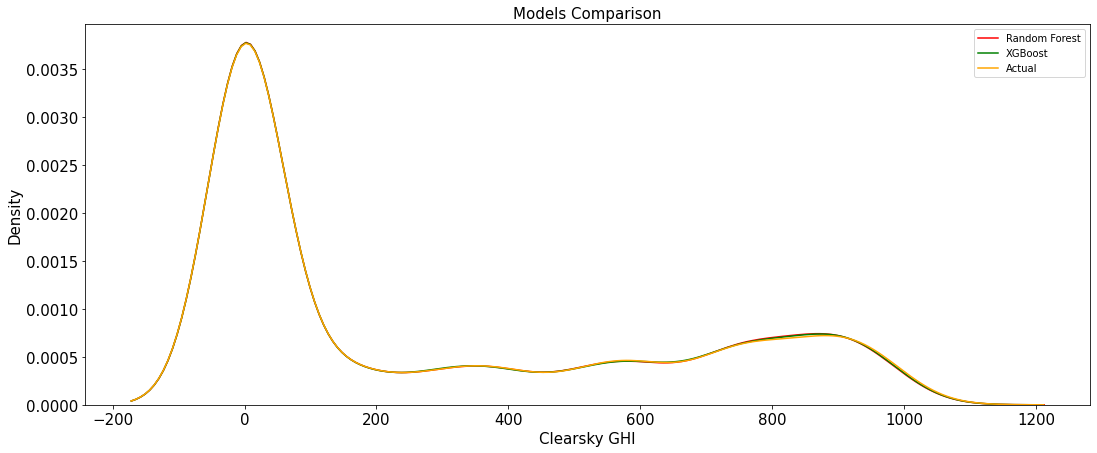

In [42]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = pred_rf, color = "red", label = "Random Forest")
sns.kdeplot(x = pred_xg, color = "green", label = "XGBoost")
sns.kdeplot(x = y_test, color = "orange", label = "Actual")
plt.title("Models Comparison", size = 15)
plt.xlabel("Clearsky GHI", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()